# Identifying Ethnicity in OpenSAFELY-TPP
This short report describes how ethnicity can be identified in the OpenSAFELY-TPP database, and the strengths and weaknesses of the methods. This is a living document that will be updated to reflect changes to the OpenSAFELY-TPP database and the patient records within.

## OpenSAFELY
OpenSAFELY is an analytics platform for conducting analyses on Electronic Health Records inside the secure environment where the records are held. This has multiple benefits: 

* We don't transport large volumes of potentially disclosive pseudonymised patient data outside of the secure environments for analysis
* Analyses can run in near real-time as records are ready for analysis as soon as they appear in the secure environment
* All infrastructure and analysis code is stored in GitHub repositories, which are open for security review, scientific review, and re-use

A key feature of OpenSAFELY is the use of study definitions, which are formal specifications of the datasets to be generated from the OpenSAFELY database. This takes care of much of the complex EHR data wrangling required to create a dataset in an analysis-ready format. It also creates a library of standardised and validated variable definitions that can be deployed consistently across multiple projects. 

The purpose of this report is to describe all such variables that relate to BMI, their relative strengths and weaknesses, in what scenarios they are best deployed. It will also describe potential future definitions that have not yet been implemented.

## Available Records
OpenSAFELY-TPP runs inside TPP’s data centre which contains the primary care records for all patients registered at practices using TPP’s SystmOne Clinical Information System. This data centre also imports external datasets from other sources, including A&E attendances and hospital admissions from NHS Digital’s Secondary Use Service, and death registrations from the ONS. More information on available data sources can be found within the OpenSAFELY documentation. 

In [1]:
from IPython.display import display, Markdown
from lib import *

pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None 

In [2]:
### CONFIGURE OPTIONS HERE ###

# Import file
input_path = '../output/data/input.feather'

# Definitions
definitions = ['ethnicity_snomed_5', 'ethnicity_5']

other_vars = []

# Dates
date_min = '2019-01-01'
date_max = '2019-12-31'
time_delta = 'M'

# Null value – 0 or NA
null = "0"

# Covariates
demographic_covariates = ['age_band', 'sex', 'region', 'imd']
clinical_covariates = ['dementia', 'diabetes', 'hypertension', 'learning_disability']

In [3]:
df_clean = import_clean(input_path, definitions, other_vars, demographic_covariates, clinical_covariates, null, time_delta, dates=False)

## Results

### Count of Patients

In [4]:
patient_counts(df_clean, definitions, demographic_covariates, clinical_covariates)

ethnicity_snomed_5_filled  \
group               subgroup                                             
population          N                                             1000   
                    with records                                   705   
age_band            0-19                                            80   
                    20-29                                           90   
                    30-39                                           90   
                    40-49                                          105   
                    50-59                                           90   
                    60-69                                           75   
                    70-79                                           85   
                    80+                                             90   
sex                 F                                              360   
                    M                                              345   
region              East Midlands                                   40   
                    East of England                                 50   
                    London                                          80   
                    North East                                      60   
                    North West                                      50   
                    South East                                      95   
                    West Midlands                                   50   
                    Yorkshire and the Humber                        35   
imd                 100                                            130   
                    200                                            140   
                    300                                            155   
                    400                                            140   
                    500                                            150   
dementia            False                                          700   
                    True                                             5   
diabetes            False                                          700   
                    True                                             5   
hypertension        False                                          700   
                    True                                             -   
learning_disability False                                          700   
                    True                                             5   

                                             ethnicity_snomed_5_pct  \
group               subgroup                                          
population          N                                           100   
                    with records                               70.5   
age_band            0-19                                          8   
                    20-29                                         9   
                    30-39                                         9   
                    40-49                                      10.5   
                    50-59                                         9   
                    60-69                                       7.5   
                    70-79                                       8.5   
                    80+                                           9   
sex                 F                                            36   
                    M                                          34.5   
region              East Midlands                                 4   
                    East of England                               5   
                    London                                        8   
                    North East                                    6   
                    North West                                    5   
                    South East                                  9.5   
                    West Midlands 

### Count of Missings

In [5]:
patient_counts(df_clean, definitions, demographic_covariates, clinical_covariates, missing=True)

ethnicity_snomed_5_missing  \
group               subgroup                                              
population          N                                              1000   
                    missing records                                 295   
age_band            0-19                                             25   
                    20-29                                            40   
                    30-39                                            30   
                    40-49                                            35   
                    50-59                                            45   
                    60-69                                            45   
                    70-79                                            30   
                    80+                                              45   
sex                 F                                               145   
                    M                                               145   
region              East Midlands                                    20   
                    East of England                                  15   
                    London                                           35   
                    North East                                       20   
                    North West                                       20   
                    South East                                       45   
                    West Midlands                                    15   
                    Yorkshire and the Humber                         20   
imd                 100                                              60   
                    200                                              45   
                    300                                              70   
                    400                                              45   
                    500                                              75   
dementia            False                                           290   
                    True                                              -   
diabetes            False                                           290   
                    True                                              -   
hypertension        False                                           290   
                    True                                              -   
learning_disability False                                           290   
                    True                                              -   

                                             ethnicity_snomed_5_pct  \
group               subgroup                                          
population          N                                           100   
                    missing records                            29.5   
age_band            0-19                                        2.5   
                    20-29                                         4   
                    30-39                                         3   
                    40-49                                       3.5   
                    50-59                                       4.5   
                    60-69                                       4.5   
                    70-79                                         3   
                    80+                                         4.5   
sex                 F                                          14.5   
                    M                                          14.5   
region              East Midlands                                 2   
                    East of England                             1.5   
                    London                                      3.5   
                    North East                                    2   
                    North West                                    2   
                    South East                                  4.5   

### Overlapping Definitions

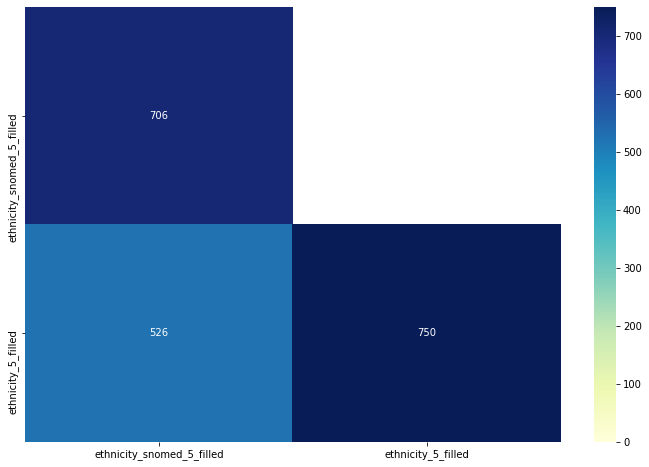

In [6]:
display_heatmap(df_clean, definitions)